# STAT 207 Project 01 - What makes a song a bop?

Quinn Crockling & Gabe Price

### Contribution Report

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions of each team member to report.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

tpric5 should be graded. Quinn Crockling (qdc2) & Gabe Price (tpric5) worked together on all parts of this project

## 1. Introduction

Motivation:

Does pandas know what makes a song a bop? We ask this question with a true curiosity of what correlations there are between variables for good and bad music; moreover, what goes into making a bop. When listening to music what are the things that we hear and go unheard, giving us the feeling of favoritism towards that particular song? This brings us to our research question: 

Research Question:

What specific audio features, both perceptible and imperceptible, contribute to the popularity of a song, and how can these features be quantitatively measured to determine the likelihood of a song becoming a "bop"?

In [280]:
#Imports here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
df = pd.read_csv("/Users/gabeprice/Desktop/uiuc/stat207/tpric5/project_01/spotify_songs.csv")

In what situation could an answer to our research question be helpful?

The answer to our research question can help in discovering new music. If there is a trend in the variables that create your favorite songs, you can find similar music by filtering for those same variables.

## 2. Dataset Discussion

Source:

My partner and I found this data after searching Kaggle for a dataset that fit the limitations of this project! The link to this dataset is https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs/data and we accessed the data by reading in the downloaded csv file with pandas. There is a very detailed codebook on this data set provided to us by the creator!

Data Collection:

The data was originally collected by scraping the Spotify API and creating a clean csv from the data scraped.

In [282]:
print("Dataset: ")
df.head(20)

Dataset: 


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [283]:
print("The shape of the dataframe is: " + str(df.shape))
print('-' * 50)
print(df.info())

The shape of the dataframe is: (114000, 21)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114

Unit of Observation:

The unit of observation in our data is the popularity variable. This is our unit of observation because we want to know what variables correlate with a popular song, or "bop".

Variables:

For this project, we will focus on the variables tempo and if the track is explicit or not. We picked these variables because we beleive they will show strong correlation to the popularity of a song.

In [284]:
print("Genres: " + str(df["track_genre"].unique()))
print('-' * 50)
print("There are " + str(len(df["track_genre"].unique())) + " different genres in this dataset")

Genres: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanej

Limitations:

The limitations that exist within are data are the fact that many of the variables are assumptions and not exact; moreover, the time signature is an "Estimated time signature of the track (3 to 7)." and not an exact value. The information included in our data is essentially everything you would need to analyze a song, the only drawback is that there are some columns that are estimated and cannot be trusted with 100% accuracy. We do not beleive that anything could be added; however, I would love to change the "track_genre" column to only have 4-7 genres and not 114 different genres.

## 3. Dataset Cleaning

Missing Values:

In [285]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [286]:
print("Here is the row that is causing the issues with missing values: ")
df[df["artists"].isna()]

Here is the row that is causing the issues with missing values: 


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


There seems to be a missing value for artists, album_name, and track_name; however, they are all in the same row. Therefore, we are able to remove this unnamed row from the dataset and resolve the missing values.

In [287]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Uncommon Values:

The only values in this dataset that appear to be uncommon are the ones that correlate to the loudness of the music. I am confused by the negative mean, min, median, and lower quartile of this column. However, after research I have discovered that it is possible to have negative decibels; therefore, these values are not uncommon and are valid to the study.

After making further evaluation in part 4 of this project, we discovered that there are many songs with tempo of 0. These rows need to be deleted becuase they directly affect how our future models will be run.

In [288]:
# dropping all of the tempo values that are 0
df = df[df["tempo"] != 0]

In [289]:
df["tempo"].describe()

count    113843.000000
mean        122.316290
std          29.653447
min          30.200000
25%          99.430000
50%         122.023000
75%         140.077500
max         243.372000
Name: tempo, dtype: float64

Other Data Cleaning:

Fortunately, my partner and I picked a dataset that would have little missing values and data that was all relevant to the unit of observation. Therefore, we do not have any additional data cleaning to partake in.

## 4. Summarizing Data

Research Question:

The research question we aim to answer is: What is the relationship between a song's tempo and explicit content on its popularity?

In [290]:
# Convert the explicit column to binary (True: 1, False: 0)
df["explicit"] = df["explicit"].astype(int)

In [291]:
observations = df[['explicit', 'tempo', 'popularity']]

# find the correlation of the observed value(s)
observations.corr()

,explicit,tempo,popularity
explicit,1.000000,-0.004588,0.044168
tempo,-0.004588,1.000000,0.014370
popularity,0.044168,0.014370,1.000000


After running this correlation matrix, we see clearly that there is little to no correlation between tempo, explicit level, and popularity. We will now conduct a linear regression to display this low correlation.

In [292]:
# generate a linear regression
X = df[['tempo', 'explicit']] 
Y = df['popularity']   

# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# residuals and predictions
y_pred = model.predict(X)
residuals = Y - y_pred

Intercept: 31.589537800251097
Coefficient: 0.010967245324474845


Generate Visualization: 


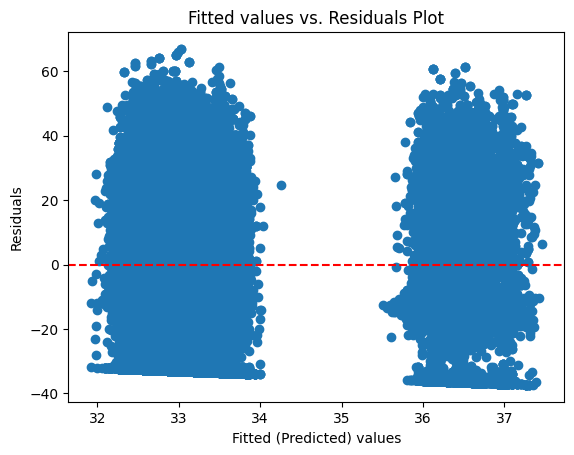

In [293]:
print("Generate Visualization: ")

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

This indicates that neither a song's explicit content nor its tempo significantly affects its popularity.

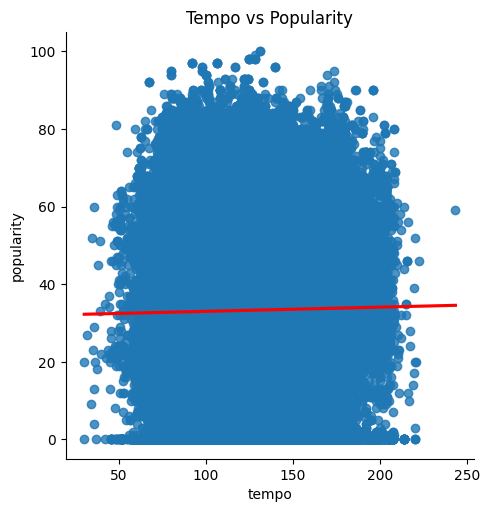

In [294]:
sns.lmplot(x='tempo', y='popularity', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Tempo vs Popularity')
plt.show()

This plot shows the same result as the residual plot; moreover, tempo demonstrates very little to no linearity with a song's popularity. This indicates that tempo alone does not have a strong linear relationship with popularity, as reflected by a correlation of only 0.0143.

Summary Statistics: 


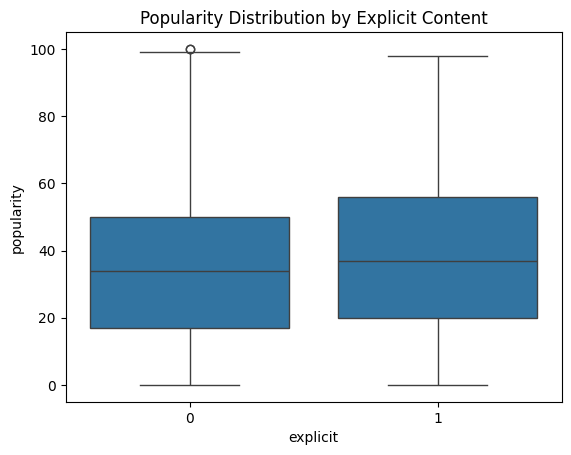

In [295]:
print("Summary Statistics: ")

# generate a side by side box and whisker plot for true and false
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Popularity Distribution by Explicit Content')
plt.show()

In [296]:
print("Here is the side by side comparison seen above in dataframe form using the .describe() function: ")
observations.groupby("explicit")["popularity"].describe()

Here is the side by side comparison seen above in dataframe form using the .describe() function: 


,count,mean,std,min,25%,50%,75%,max
explicit,,,,,,,,
0,104096.0,32.931467,22.095632,0.0,17.0,34.0,50.0,100.0
1,9747.0,36.454191,24.317510,0.0,20.0,37.0,56.0,98.0


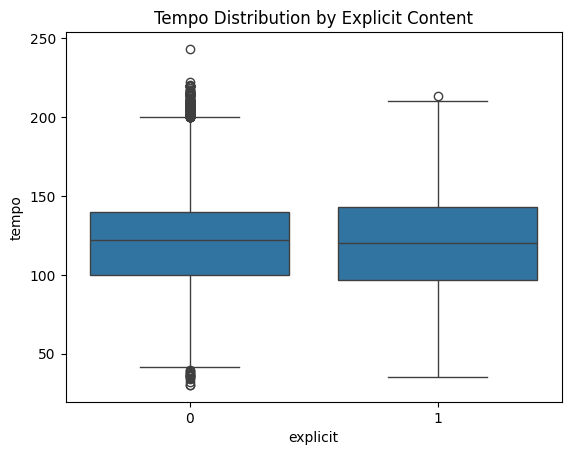

In [297]:
# generate a side by side box and whisker plot for true and false
sns.boxplot(x='explicit', y='tempo', data=df)
plt.title('Tempo Distribution by Explicit Content')
plt.show()

In [298]:
print("Here is the side by side comparison seen above in dataframe form using the .describe() function: ")
observations.groupby("explicit")["tempo"].describe()

Here is the side by side comparison seen above in dataframe form using the .describe() function: 


,count,mean,std,min,25%,50%,75%,max
explicit,,,,,,,,
0,104096.0,122.357918,29.563782,30.200,99.903,122.111,140.049,243.372
1,9747.0,121.871713,30.592701,35.392,96.507,119.973,143.093,213.778


The side-by-side box and whisker plots show that the distribution of song popularity is nearly identical for both explicit and non-explicit songs. The medians, interquartile ranges, and overall spread of the data for both categories are very similar, indicating that explicit content does not significantly impact a song's popularity or tempo. This suggests that other factors, beyond explicit content, are likely more influential in determining a song's popularity.

Discuss:

These results answer our research question by demonstrating that there is little to no correlation between the variables of interest. Specifically, the relationship between a song's tempo, explicit content, and its popularity shows that neither variable significantly impacts popularity, nor do they correlate with each other. This suggests that factors other than tempo and explicit content are more likely to influence a song's popularity, providing a clear conclusion to our research question.

## 5. Conclusion

Summarization: 

In this project, we analyzed a dataset of over 114,000 songs from Spotify to explore the question: does pandas know what makes a song a bop? We investigated the correlations between specific audio features—both perceptible and imperceptible—and a song’s popularity, with a focus on tempo and explicit content. Using data cleaning, correlation analysis, and linear regression, we found that neither tempo nor explicit content significantly contributes to a song's popularity. This suggests that the factors driving a song’s success are more complex and cannot be explained by these two features alone.

Limitations: 

There were several limitations in our analysis. First, the complexity of musical popularity is influenced by subjective factors like cultural trends and individual preferences, which cannot be captured in this dataset. Additionally, our analysis focused only on two variables—tempo and explicit content—potentially overlooking other important factors such as genre, artist popularity, or marketing strategies.

Future Work:

Future research could expand upon this analysis by incorporating additional variables such as genre, artist popularity, and release year, which may have stronger correlations with a song’s popularity. These factors could provide a more comprehensive understanding of what drives musical success, especially considering how genre preferences and artist followings influence listener engagement.

Additionally, future studies could analyze the content of the lyrics to determine if specific themes, language, or emotional tone contribute to a song’s popularity. Incorporating listener feedback or sentiment analysis from reviews and social media could also offer valuable insights into the subjective elements of what makes a song resonate with audiences. By broadening the scope to include these factors, future research could paint a more complete picture of the complex dynamics behind musical popularity, shedding light on what truly makes a song a "bop" and how various variables interact to shape listener preferences.